First of import the Necessary Libraries for the Project. In this I'm using numpy,pandas,matplotlib,seaborn,plotly libraries. The Plotly Library is Specially imported for Candlestick Plot but also used in someother plot as well

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.graph_objs import Figure
%matplotlib inline

We need to upload the csv and read the file using the pandas library

In [ ]:
df=pd.read_csv('/content/Nifty50.csv')

Let's view some basic information about the data frame.

In [ ]:
df.shape

(2059, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2055 non-null   object 
 1   Open             2055 non-null   float64
 2   High             2055 non-null   float64
 3   Low              2055 non-null   float64
 4   Close            2055 non-null   float64
 5   Shares Traded    2057 non-null   float64
 6   Turnover (₹ Cr)  2057 non-null   float64
dtypes: float64(6), object(1)
memory usage: 112.7+ KB


All the columns were detected as numeric columns.Let's now view some basic statistics about numeric columns.

In [ ]:
df.describe()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
count,2055.000000,2055.000000,2055.000000,2055.000000,2.057000e+03,2057.000000
mean,13008.052871,13067.218078,12925.816691,12998.518224,3.457310e+08,19749.102304
std,3992.772443,4005.527444,3974.894830,3992.111635,1.988968e+08,9903.983883
min,7023.650000,7034.200000,6825.800000,6970.600000,1.661087e+07,805.890000
25%,10002.575000,10043.450000,9948.050000,9986.775000,2.100216e+08,11403.300000
50%,11540.150000,11584.100000,11461.000000,11521.800000,2.752217e+08,18725.570000
75%,17095.175000,17200.900000,16958.300000,17078.800000,4.377039e+08,25411.480000
max,22290.000000,22297.500000,22186.100000,22217.450000,1.811564e+09,78522.930000


Let's take a look at a sample of rows from the data frame.

In [ ]:
df.sample(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
1594,20-04-2022,17045.25,17186.90,16978.95,17136.55,286069736.0,25972.15
711,20-10-2017,11164.40,11170.15,10943.60,10967.40,398815949.0,23023.34
1328,22-03-2021,14736.30,14763.90,14597.85,14736.40,458997059.0,27345.02
237,03-07-2016,8607.10,8624.85,8550.25,8615.25,250336333.0,12300.53
603,04-07-2017,10578.90,10594.20,10509.70,10526.20,211823044.0,9888.65
58,06-01-2016,7392.45,7419.40,7350.30,7361.80,197863301.0,6748.17
1168,03-08-2020,11057.55,11058.05,10882.25,10891.60,680929323.0,31149.94
1636,20-06-2022,15334.50,15382.50,15191.10,15350.15,260022438.0,18531.78
1080,24-10-2018,7848.30,8036.95,7511.10,7801.05,739354439.0,28282.09
186,13-05-2016,8686.70,8690.10,8564.60,8575.30,178963496.0,8206.18


Find the Total Number of null values in the dataframe

In [ ]:
df.isnull().sum()

Date               4
Open               4
High               4
Low                4
Close              4
Shares Traded      2
Turnover (₹ Cr)    2
dtype: int64

Fill the na values with the Ffill which replace th na values with the its previous values

In [ ]:
df.fillna(method='ffill',inplace=True)

We can use the Line Plot for the Opening Market Price

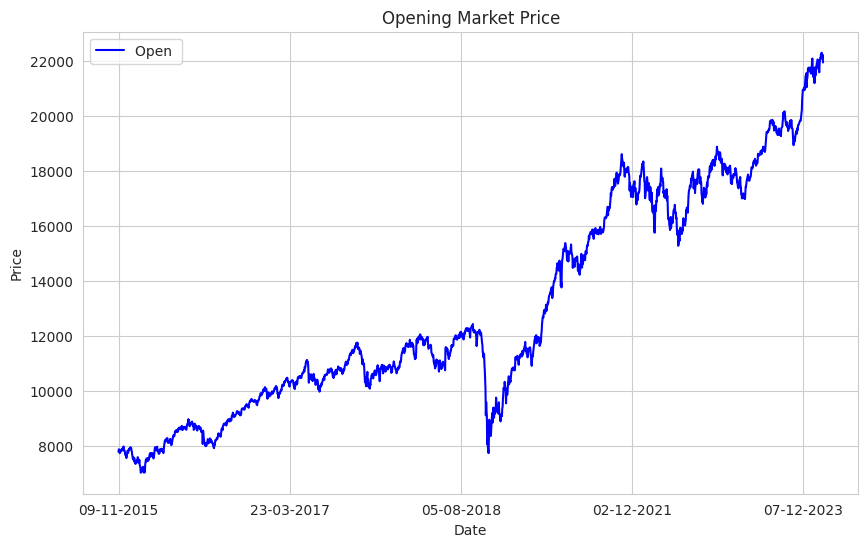

In [ ]:
sns.set_style('whitegrid')
df.plot(x='Date ', y='Open ',style='b', figsize=(10, 6))
plt.title('Opening Market Price')
plt.xlabel('Date'); plt.ylabel('Price');


For Closing Market Price also we use Line Plot

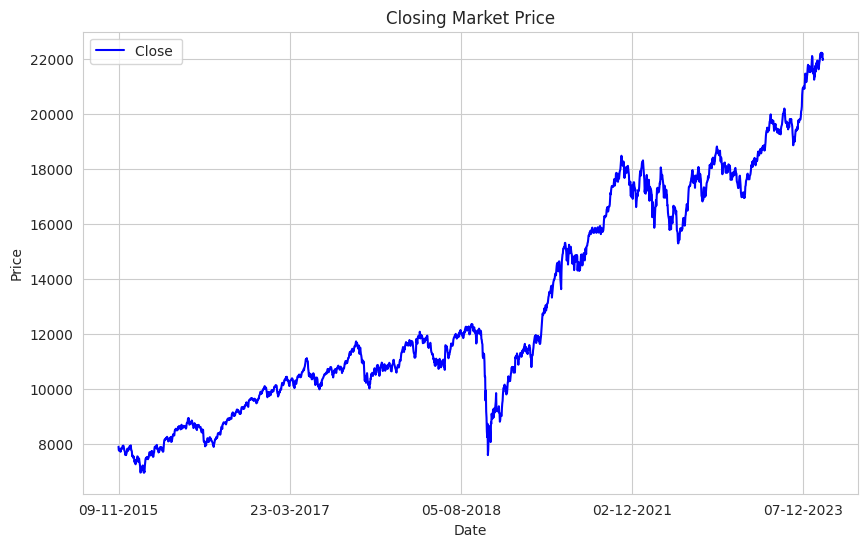

In [ ]:
sns.set_style('whitegrid')
df.plot(x='Date ', y='Close ',style='b', figsize=(10, 6))
plt.title('Closing Market Price')
plt.xlabel('Date'); plt.ylabel('Price');

We can use Multiplot For Low And High Values in the Dataframe

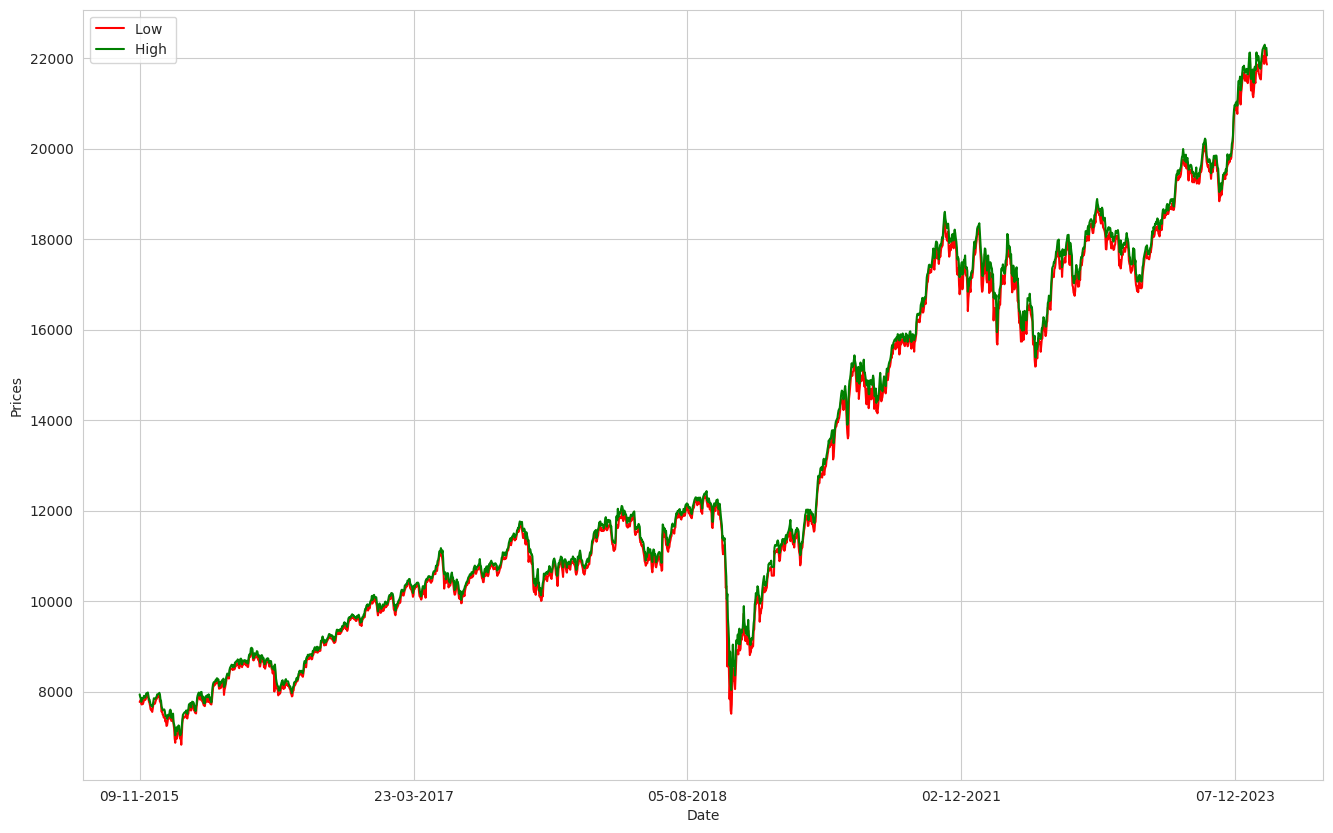

In [ ]:

df.plot(x='Date ',y=['Low ','High '],style=['r-','g-'],figsize=(16,10));
plt.legend(loc=2);
plt.xlabel('Date');plt.ylabel('Prices');

We can create a new dataframe df1 and set the Date as index

In [ ]:
df1=df.set_index(pd.DatetimeIndex(df['Date '].values))
df1.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
2015-09-11,09-11-2015,7788.25,7937.75,7771.70,7915.20,218422388.0,9376.17
2015-10-11,10-11-2015,7877.60,7885.10,7772.85,7783.35,170267413.0,7153.47
2015-11-11,11-11-2015,7838.80,7847.95,7819.10,7825.00,22380435.0,1123.44
2015-12-11,12-11-2015,7762.45,7775.10,7730.90,7762.25,165876819.0,7731.55
2015-11-13,13-11-2015,7732.95,7838.85,7714.15,7806.60,154134885.0,6871.15


After setting date as index in a dataframe create a interactive candlestick plot using plotly for further analysis

In [ ]:
figure=go.Figure(
    data=[
      go.Candlestick(
        x=df1.index,
        low=df['Low '],
        high=df['High '],
        close=df['Close '],
        open=df['Open '],
        increasing_line_color='green',
        decreasing_line_color='red'
    )
    ]
)
figure.update_layout(
    title='Nifty50 Data',
    yaxis_title='Price',
    xaxis_title='Date'
)

figure.show()

Lets Look at market performance from selective years Eg: we choose from 2022 onwards.

In [ ]:
df2022 = df1[df1.index>'2022-01-01']
df2022.shape
df2022.head(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
2022-03-01,03-01-2022,17387.15,17646.65,17383.30,17625.70,200456430.0,16181.36
2022-04-01,04-01-2022,17681.40,17827.60,17593.55,17805.25,247437472.0,18604.16
2022-05-01,05-01-2022,17820.10,17944.70,17748.85,17925.25,251460038.0,23737.31
2022-06-01,06-01-2022,17768.50,17797.95,17655.55,17745.90,236454824.0,22643.82
2022-07-01,07-01-2022,17797.60,17905.00,17704.55,17812.70,239338015.0,21447.89
2022-10-01,10-01-2022,17913.30,18017.45,17879.15,18003.30,232418075.0,20853.64
2022-11-01,11-01-2022,17997.75,18081.25,17964.40,18055.75,220238796.0,20781.46
2022-12-01,12-01-2022,18170.40,18227.95,18128.80,18212.35,244974287.0,22298.69
2022-01-13,13-01-2022,18257.00,18272.25,18163.80,18257.80,303700545.0,28670.93
2022-01-14,14-01-2022,18185.00,18286.95,18119.65,18255.75,229451608.0,21024.51


Do one more Interactive Candlestick plot to analayse the Data from the year 2022 January 1st

In [ ]:
fig =go.Figure(
    data=[go.Candlestick(
        x=df2022.index,
        open=df2022['Open '],
        high=df2022['High '],
        low=df2022['Low '],
        close=df2022['Close ']
    )]
)
fig.show()

Create a Histogram of Marketing Opening Rate,Low Market Rate, High Market Rate,Closing Market Rate Subplots

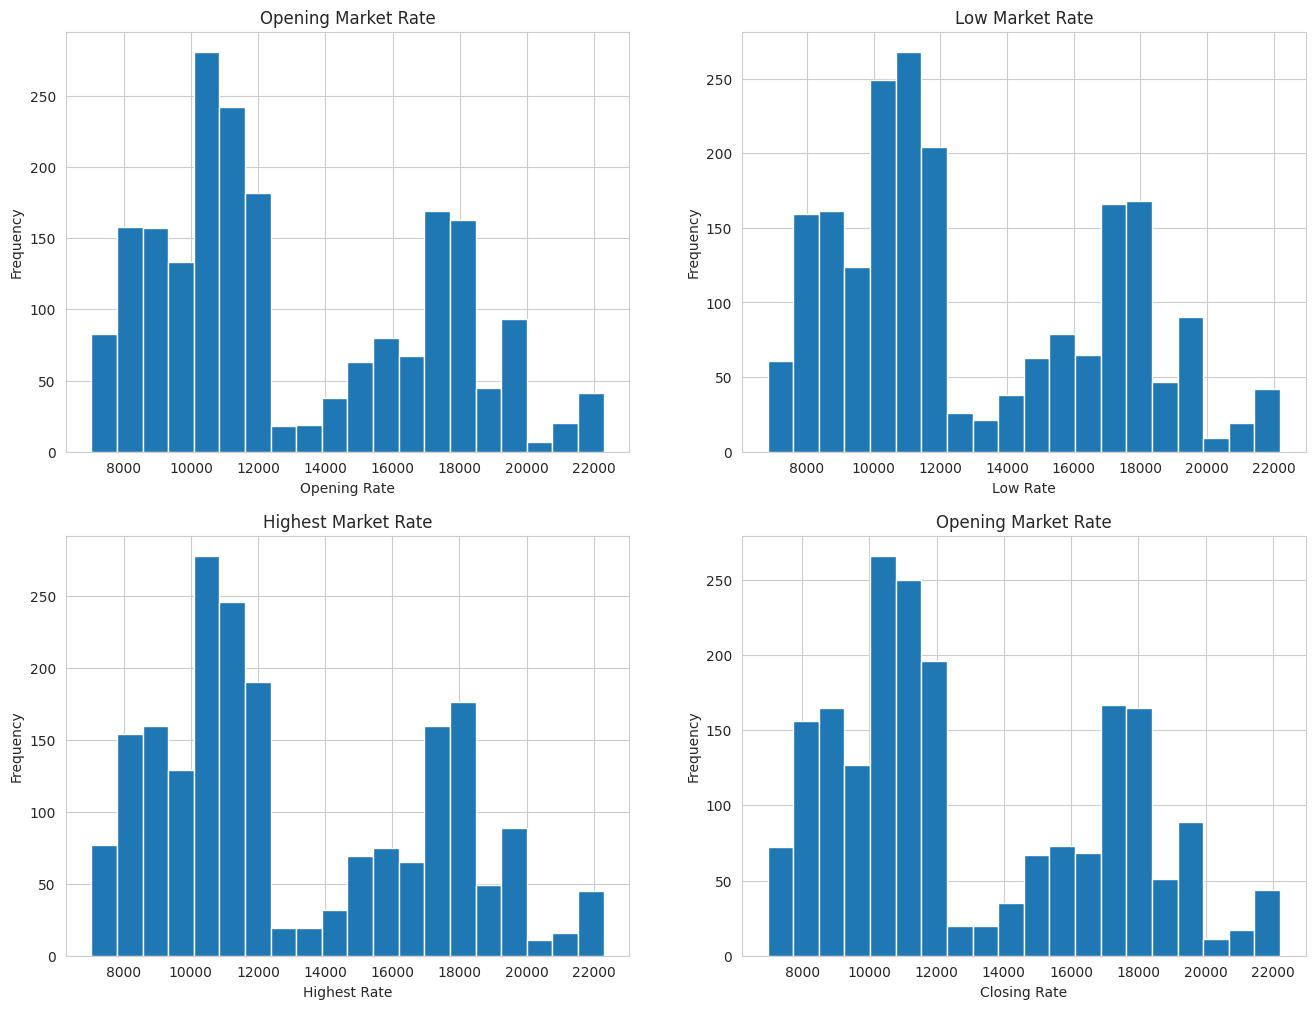

In [ ]:

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
df['Open '].plot(kind='hist',bins=20,title='Opening Market Rate')
plt.xlabel('Opening Rate')
plt.subplot(2,2,2)
df['Low '].plot(kind='hist',bins=20,title='Low Market Rate')
plt.xlabel('Low Rate')
plt.subplot(2,2,3)
df['High '].plot(kind='hist',bins=20,title='Highest Market Rate')
plt.xlabel('Highest Rate')
plt.subplot(2,2,4)
df['Close '].plot(kind='hist',bins=20,title='Opening Market Rate')
plt.xlabel('Closing Rate');

Lets Create a Interactive Histogram of Total Shares traded using the DataFrames and Date

In [ ]:
fig = go.Figure(
    data=[go.Histogram(
        x=df1.index,
        y=df['Shares Traded ']
    )]
)

fig.update_layout(
    title='Shares Traded',
    xaxis_title='Date',
    yaxis_title='Number of Shares',
    title_x=0.5
)

fig.show()

Lets Create a Interactive Histogram of yearly Turnover in Cr using the DataFrames and Date


In [ ]:
fig = go.Figure(
    data=[go.Histogram(
        x=df1.index,
        y=df['Turnover (₹ Cr)']
    )]
)

fig.update_layout(
    title='Yearly Turnover',
    xaxis_title='Date',
    yaxis_title='Turnover (₹ Cr)',
    title_x=0.5
)

fig.show()

Lets Create an Interactive Scatterplot of Nifty50 Closing Market Rate

In [ ]:

fig = Figure(data=[go.Scatter(x=df['Date '], y=df['Close '], mode='markers')])
fig.update_layout(
    title='Nifty 50 Closing Market Price',
    xaxis_title='Date',
    yaxis_title='Closing Market Price'
)

fig.show()



Lets Create interactive Highest Market Price using a BoxPlot for the Nifty50 Data.

In [ ]:
fig = Figure()
fig.add_trace(go.Box(x=df['Date '], y=df['High '], name='Stock Prices'))
fig.update_layout(
    title='Highest Market Price',
    xaxis_title='Date',
    yaxis_title='Price'
)

fig.show()


#Questions


##Question1:Why we need to get these plots on these data.


#Answer: We use these plots to visually appealing plots

##Question2: why using plotly instead of matplotlib or seaborn for Plotting

#Answer:Plotly provides beautiful Interactive plots unlike Matplotlib and Seaborn. Also candlestick plot which i used is not available on the matplotlib or seaborn

##Question3:Does plotly really helpful for this dataset?

#Answer:Yes Plotly is really helpful for this dataset especially in creating the candlestick chart

##Question4: What is Candlestick chart?

#A candlestick chart is a type of financial chart used to visualize  price movements of a security, like a stock, currency, or commodity,